In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


Text(0, 0.5, 'Y dataset')

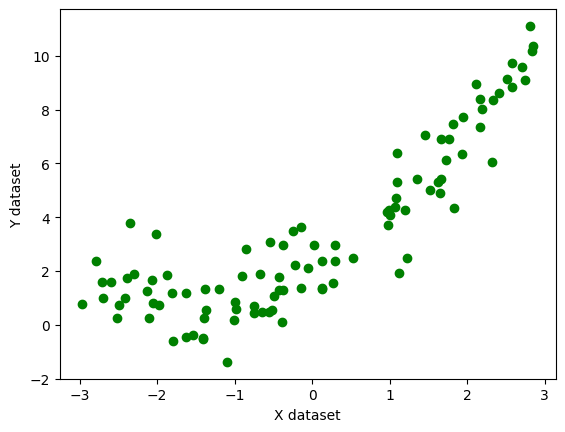

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
## Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [10]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
print(score)

0.7267011506373238


Text(0, 0.5, 'Y')

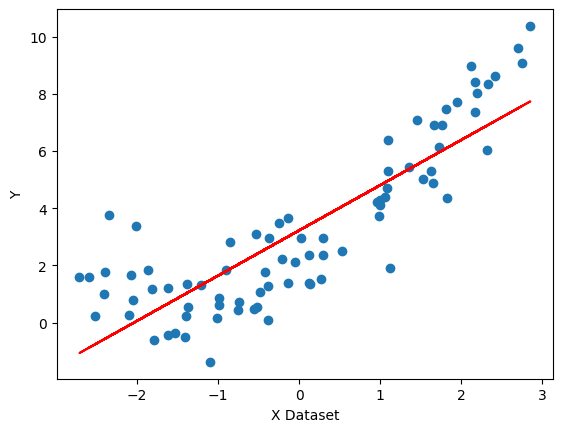

In [12]:
## Visualization

plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [15]:
X_train_poly

array([[ 1.00000000e+00, -2.00821203e+00,  4.03291557e+00],
       [ 1.00000000e+00,  2.17066090e+00,  4.71176876e+00],
       [ 1.00000000e+00, -1.62445487e+00,  2.63885362e+00],
       [ 1.00000000e+00,  1.65744447e+00,  2.74712216e+00],
       [ 1.00000000e+00, -1.53162306e+00,  2.34586919e+00],
       [ 1.00000000e+00,  2.16311891e+00,  4.67908341e+00],
       [ 1.00000000e+00,  2.19326483e+00,  4.81041059e+00],
       [ 1.00000000e+00,  1.45835219e+00,  2.12679110e+00],
       [ 1.00000000e+00, -2.09853467e+00,  4.40384777e+00],
       [ 1.00000000e+00, -1.20656741e+00,  1.45580493e+00],
       [ 1.00000000e+00, -1.38501116e+00,  1.91825592e+00],
       [ 1.00000000e+00, -2.59918893e+00,  6.75578310e+00],
       [ 1.00000000e+00,  2.70518073e+00,  7.31800276e+00],
       [ 1.00000000e+00, -5.59058629e-01,  3.12546550e-01],
       [ 1.00000000e+00, -2.52184399e+00,  6.35969709e+00],
       [ 1.00000000e+00, -1.79352003e+00,  3.21671409e+00],
       [ 1.00000000e+00,  2.32186402e+00

In [7]:
X_test_poly

array([[ 1.        , -2.96679333,  8.80186265],
       [ 1.        , -0.4291221 ,  0.18414577],
       [ 1.        ,  1.66709647,  2.77921062],
       [ 1.        , -2.79467417,  7.81020372],
       [ 1.        , -2.29371837,  5.26114397],
       [ 1.        ,  2.80627348,  7.87517082],
       [ 1.        , -0.65119408,  0.42405374],
       [ 1.        ,  2.58202477,  6.6668519 ],
       [ 1.        ,  2.57847231,  6.64851943],
       [ 1.        , -0.66862063,  0.44705355],
       [ 1.        ,  1.93772724,  3.75478685],
       [ 1.        ,  2.51903829,  6.34555389],
       [ 1.        ,  1.19728561,  1.43349284],
       [ 1.        , -2.49670502,  6.23353595],
       [ 1.        , -1.98067369,  3.92306828],
       [ 1.        , -2.70088803,  7.29479617],
       [ 1.        ,  1.22539744,  1.50159888],
       [ 1.        , -1.40228158,  1.96639364],
       [ 1.        , -2.12758063,  4.52659934],
       [ 1.        ,  2.83079052,  8.01337496]])

In [16]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9552159145481333


In [17]:
print(regression.coef_)

[[0.         1.52090737 0.49178176]]


In [18]:
print(regression.intercept_)

[2.05825114]


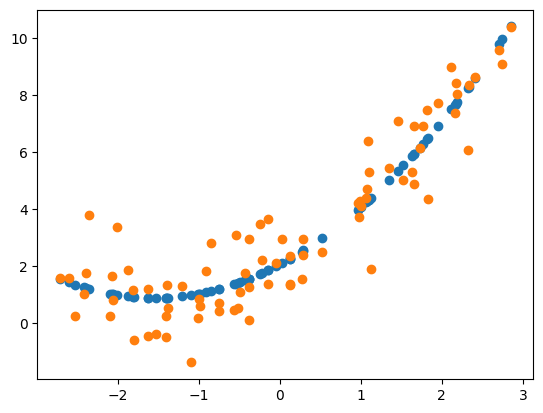

In [19]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [20]:
## PipeLine Concepts

from sklearn.pipeline import Pipeline

def poly_regression(degree):
     X_new = np.linspace(-3, 3, 200).reshape(200, 1)
     poly_features=PolynomialFeatures(degree=degree,include_bias=True)
     lin_reg=LinearRegression()
     poly_regression=Pipeline([
          ("poly_features",poly_features),
          ("lin_reg",lin_reg)
     ])
     poly_regression.fit(X_train,y_train)
     y_pred_new=poly_regression.predict(X_new)

     ##plotting
     plt.plot(X_new,y_pred_new,'r',label="Degree "+str(degree),linewidth=2)
     plt.plot(X_train, y_train, "b.", linewidth=3)
     plt.plot(X_test,y_test, "g.", linewidth=3)
     plt.legend(loc="upper left")
     plt.xlabel("X")
     plt.ylabel("y")
     plt.axis=([-4,4,0,10])
     plt.show()

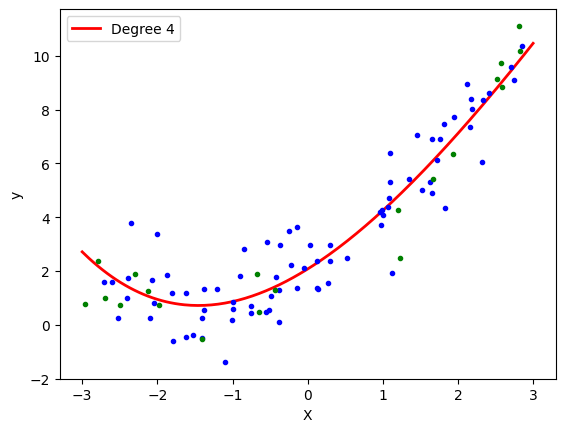

In [21]:
poly_regression(4)

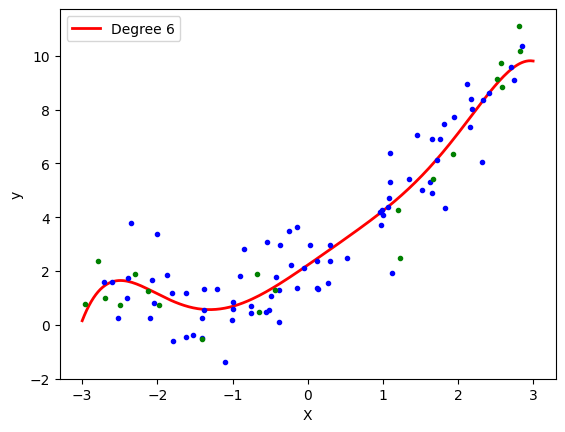

In [22]:
poly_regression(6)

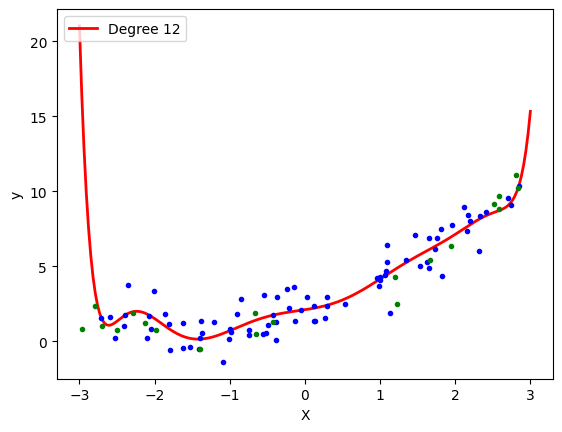

In [23]:
poly_regression(12)